## <div style="text-align: center"> DA5401 Data Analytics Labarotary  </div>

### <div style="text-align: center">Assignment 9 - Submitted by: DA24M011 - Nandhakishore C S</div>

I am submitting this assignment late. Apologies for the delay. As I had flu in the previous week, I was not able to submit on time. I have informed the TA regarding the same

#### Task 1 [15 Points]

<p style='text-align: justify;'> 
    The challenge dataset contains ~70k training image in 5 categories with the respective attributes. For each category, pick any two attributes of your choice (say color or length or pattern, or any) to form baskets. Each basket is a <category, attribute> tuple. You will create two tuples per category, so in total you should have 10 baskets. Draw 100 samples from each basket. If your basket does not have 100 samples, reconfigure your basket by changing the attribute.
</p>

<p style='text-align: justify;'> Data Preprocessing </p>
<p style='text-align: justify;'> 
    The dataset has null values in certain categories and when sampling for baskets, it might cause problems. Thus the rows will null values are dropped. 
</p>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

raw_dataset = pd.read_csv('/Users/nandhakishorecs/Documents/IITM/Jul_2024/DA5401/Assignments/Assignment9/visual-taxonomy/train.csv')

In [2]:
raw_dataset.shape

(70213, 13)

In [3]:
raw_dataset.head()

id     Category  len      attr_1 attr_2   attr_3   attr_4         attr_5  \
0   0  Men Tshirts    5     default  round  printed  default  short sleeves   
1   1  Men Tshirts    5  multicolor   polo    solid    solid  short sleeves   
2   2  Men Tshirts    5     default   polo    solid    solid  short sleeves   
3   3  Men Tshirts    5  multicolor   polo    solid    solid  short sleeves   
4   4  Men Tshirts    5  multicolor   polo    solid    solid  short sleeves   

  attr_6 attr_7 attr_8 attr_9 attr_10  
0    NaN    NaN    NaN    NaN     NaN  
1    NaN    NaN    NaN    NaN     NaN  
2    NaN    NaN    NaN    NaN     NaN  
3    NaN    NaN    NaN    NaN     NaN  
4    NaN    NaN    NaN    NaN     NaN

In [4]:
raw_dataset.tail()

id             Category  len      attr_1   attr_2   attr_3  \
70208  70374  Women Tops & Tunics   10  multicolor   fitted  regular   
70209  70375  Women Tops & Tunics   10      yellow  regular     crop   
70210  70376  Women Tops & Tunics   10      maroon   fitted     crop   
70211  70377  Women Tops & Tunics   10         NaN      NaN      NaN   
70212  70378  Women Tops & Tunics   10        pink     boxy     crop   

            attr_4  attr_5   attr_6      attr_7         attr_8  \
70208  square neck  casual  printed     default  short sleeves   
70209   round neck  casual  default     default  short sleeves   
70210   round neck  casual    solid       solid  short sleeves   
70211         high     NaN      NaN         NaN  short sleeves   
70212       v-neck  casual  printed  typography  short sleeves   

                attr_9  attr_10  
70208  regular sleeves  ruffles  
70209  regular sleeves  knitted  
70210  regular sleeves  knitted  
70211              NaN      NaN  
70212  regular sleeves      NaN

In [5]:
raw_dataset.columns

Index(['id', 'Category', 'len', 'attr_1', 'attr_2', 'attr_3', 'attr_4',
       'attr_5', 'attr_6', 'attr_7', 'attr_8', 'attr_9', 'attr_10'],
      dtype='object')

In [6]:
raw_dataset['Category'].unique()

array(['Men Tshirts', 'Sarees', 'Kurtis', 'Women Tshirts',
       'Women Tops & Tunics'], dtype=object)

<p style='text-align: justify;'> 
    Choosing attributes from the dataset based on the description given
</p>

In [25]:
chosen_attributes = {
    'Men Tshirts'			: ['attr_1', 'attr_2'], # Color , Shirt type
    'Sarees'				: ['attr_7', 'attr_9'], # Sleeves, Pattern
    'Kurtis'				: ['attr_4', 'attr_8'], # Neck typee, Sleeves
    'Women Tshirts'			: ['attr_1', 'attr_3'], # Color, Length
    'Women Tops & Tunics'	: ['attr_1', 'attr_6']	# Color, print
}

In [8]:
dataset  = raw_dataset
Men_Tshirts = dataset[dataset['Category'] == 'Men Tshirts']
Sarees = dataset[dataset['Category']=='Sarees']
Kurtis = dataset[dataset['Category']=='Kurtis']
Women_Tshirts = dataset[dataset['Category']=='Women Tshirts']
Women_Tops_Tunics = dataset[dataset['Category']=='Women Tops & Tunics']

In [24]:
Men_T_shirts_attr1 		= Men_Tshirts[Men_Tshirts[chosen_attributes['Men Tshirts'][0]].notnull()]
Men_T_shirts_attr2 		= Men_Tshirts[Men_Tshirts[chosen_attributes['Men Tshirts'][1]].notnull()]
Sarees_attr1 			= Sarees[Sarees[chosen_attributes['Sarees'][0]].notnull()]
Sarees_attr2 			= Sarees[Sarees[chosen_attributes['Sarees'][1]].notnull()]
Kurtis_attr1 			= Kurtis[Kurtis[chosen_attributes['Kurtis'][0]].notnull()]
Kurtis_attr2 			= Kurtis[Kurtis[chosen_attributes['Kurtis'][1]].notnull()]
Women_Tshirts_attr1 	= Women_Tshirts[Women_Tshirts[chosen_attributes['Women Tshirts'][0]].notnull()]
Women_Tshirts_attr2 	= Women_Tshirts[Women_Tshirts[chosen_attributes['Women Tshirts'][1]].notnull()]
Women_Tops_Tunics_attr1 = Women_Tops_Tunics[Women_Tops_Tunics[chosen_attributes['Women Tops & Tunics'][0]].notnull()]
Women_Tops_Tunics_attr2 = Women_Tops_Tunics[Women_Tops_Tunics[chosen_attributes['Women Tops & Tunics'][1]].notnull()]

In [10]:
Men_T_shirts_sample1 = Men_T_shirts_attr1.sample(n=100, random_state=42)
Men_T_shirts_sample2 = Men_T_shirts_attr2.sample(n=100, random_state=42)
Sarees_sample1 = Sarees_attr1.sample(n=100, random_state=42)
Sarees_sample2 = Sarees_attr2.sample(n=100, random_state=42)
Kurtis_sample1 = Kurtis_attr1.sample(n=100, random_state=42)
Kurtis_sample2 = Kurtis_attr2.sample(n=100, random_state=42)
Women_Tshirts_sample1 = Women_Tshirts_attr1.sample(n=100, random_state=42)
Women_Tshirts_sample2 = Women_Tshirts_attr2.sample(n=100, random_state=42)
Women_Tops_Tunics_sample1 = Women_Tops_Tunics_attr1.sample(n=100, random_state=42)
Women_Tops_Tunics_sample2 = Women_Tops_Tunics_attr2.sample(n=100, random_state=42) 

#### Task 2 & Task 3 [20 + 15 Points]

<p style='text-align: justify;'> 
    Create the visualization like below (which we reviewed in the class) for each basket. You should use Isomap and tSNE with two components, which would represent the intrinsic dimensions of the manifold on which the dataset resides. You will have 10 visuals using Isomap and another 10 visuals vis tSNE
</p>
<p style='text-align: justify;'> 
    Recognize the patterns and figure out a name for the components your manifold learning methods have discovered. You should also reason your choice of the name to the discovered manifold dimension
</p>

In [11]:
## Taken from Dr Sudarsun's code 
from matplotlib import offsetbox
from sklearn.manifold import Isomap, TSNE
def plot_components(data, model, images=None, ax=None, thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap=cmap),proj[i])
            ax.add_artist(imagebox)

In [12]:
from PIL import Image
def load_and_flatten_image(image_id):
    try:
        formatted_id = f"{int(image_id):06d}"
        image_path = f'/Users/nandhakishorecs/Documents/IITM/Jul_2024/DA5401/Assignments/Assignment9/visual-taxonomy/train_images/{formatted_id}.jpg'
        img = Image.open(image_path)
        img = img.resize((64, 64))
        img_array = np.array(img) / 255.0
        return img_array.flatten()
    except FileNotFoundError:
        print(f"Image not found for ID: {formatted_id}")
        return None

def load_and_resize_image(image_id):
    try:
        formatted_id = f"{int(image_id):06d}"
        image_path = f'/Users/nandhakishorecs/Documents/IITM/Jul_2024/DA5401/Assignments/Assignment9/visual-taxonomy/train_images/{formatted_id}.jpg'
        img = Image.open(image_path)
        img = img.resize((45, 45))
        return img
    except FileNotFoundError:
        print(f"Image not found for ID: {formatted_id}")
        return None

<p style='text-align: justify;'> 
    Plot for Men's Tshirt Category with attribute 1
</p>

In [20]:
image_data = []
for image_id in Men_T_shirts_sample1['id']:
  img = load_and_flatten_image(image_id)
  if img is not None:
    image_data.append(img)
image_data = np.array(image_data)

image_resized=[]
for image_id in Men_T_shirts_sample1['id']:
  img = load_and_resize_image(image_id)
  if img is not None:
    image_resized.append(img)

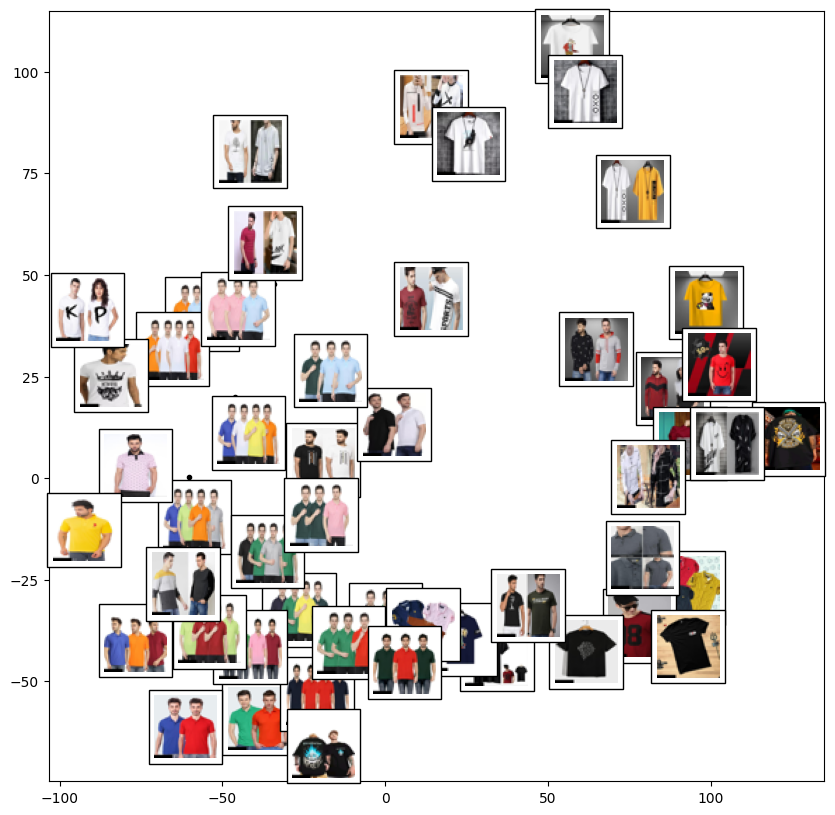

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(image_data, Isomap(n_components=2), images=image_resized, ax=ax,thumb_frac=0.05, cmap='gray')

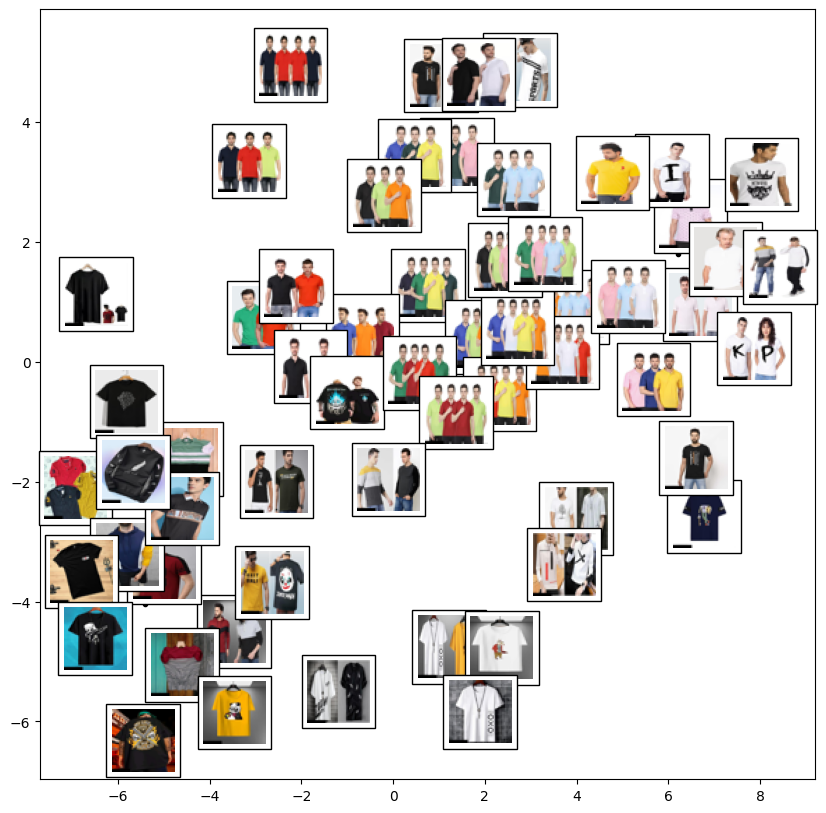

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(image_data, TSNE(n_components=2), images=image_resized, ax=ax,thumb_frac=0.05, cmap='gray')

From the above visualisations, we can clearly see that, the model has learnt the color of the shirts and has plotted them in a grids, where the black colored ones are at one end and the white colored ones are at the other end. 

<p style='text-align: justify;'> 
    Plot for Men's Tshirt Category with attribute 2
</p>

In [26]:
image_data = []
for image_id in Men_T_shirts_sample2['id']:
  img = load_and_flatten_image(image_id)
  if img is not None:
    image_data.append(img)
image_data = np.array(image_data)

image_resized=[]
for image_id in Men_T_shirts_sample2['id']:
  img = load_and_resize_image(image_id)
  if img is not None:
    image_resized.append(img)

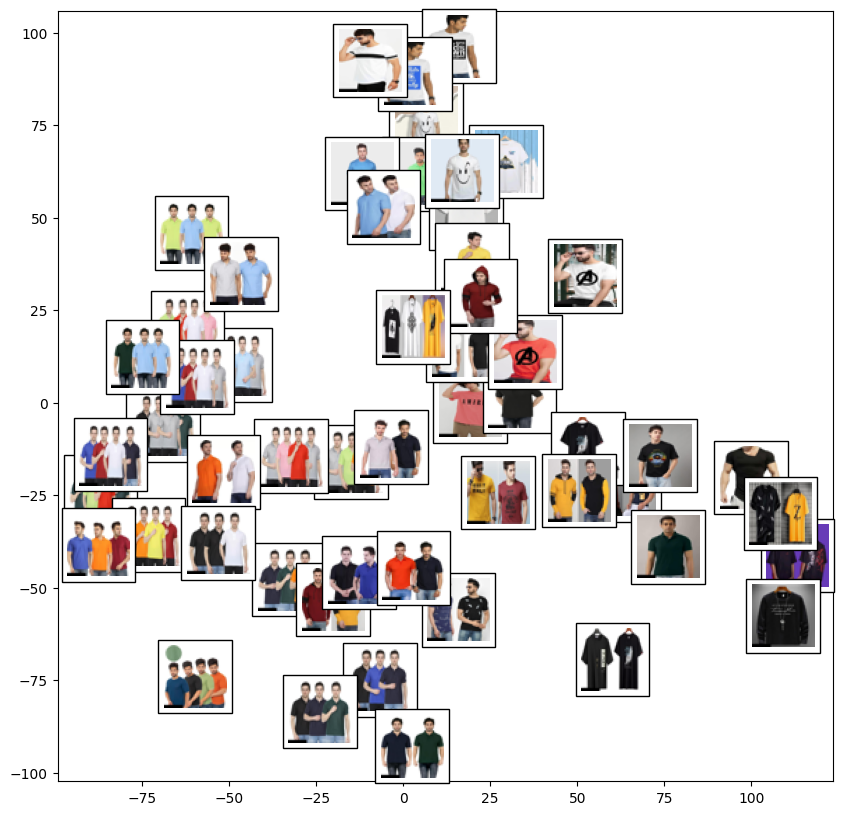

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(image_data, Isomap(n_components=2), images=image_resized, ax=ax,thumb_frac=0.05, cmap='gray')

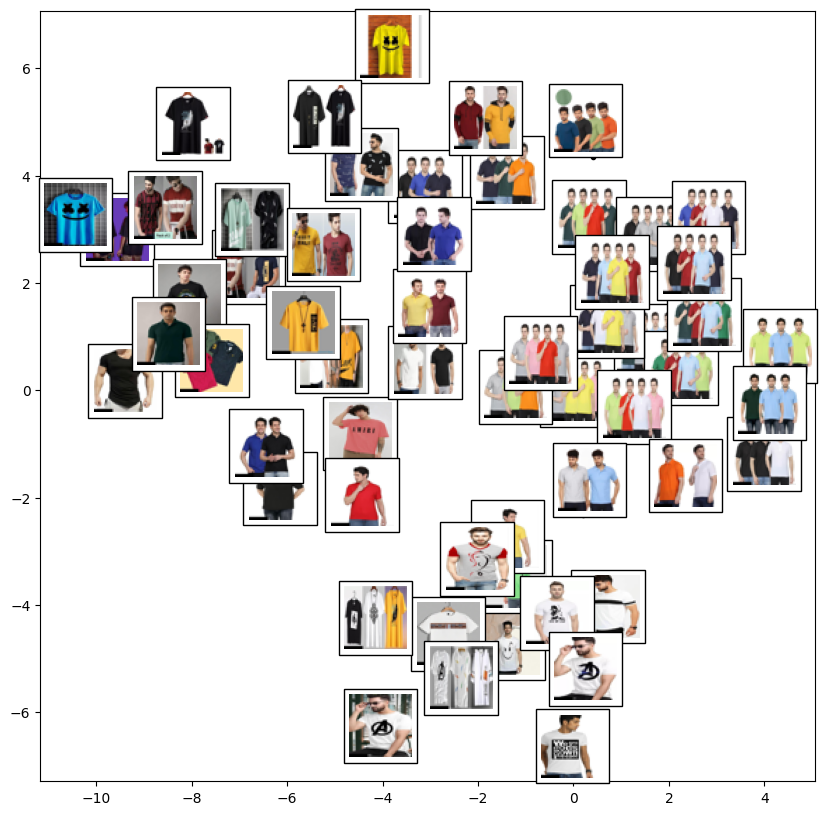

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(image_data, TSNE(n_components=2), images=image_resized, ax=ax,thumb_frac=0.05, cmap='gray')

The plots above have segggregated the images of TShirts based on two factors: One is the color (darker ones on one side and brighter ones on the opposite side) and the collar type. 

<p style='text-align: justify;'> 
    Plot for Saree Category - attribute 1 
</p>

In [29]:
image_data = []
for image_id in Sarees_sample1['id']:
  img = load_and_flatten_image(image_id)
  if img is not None:
    image_data.append(img)
image_data = np.array(image_data)

image_resized=[]
for image_id in Sarees_sample1['id']:
  img = load_and_resize_image(image_id)
  if img is not None:
    image_resized.append(img)

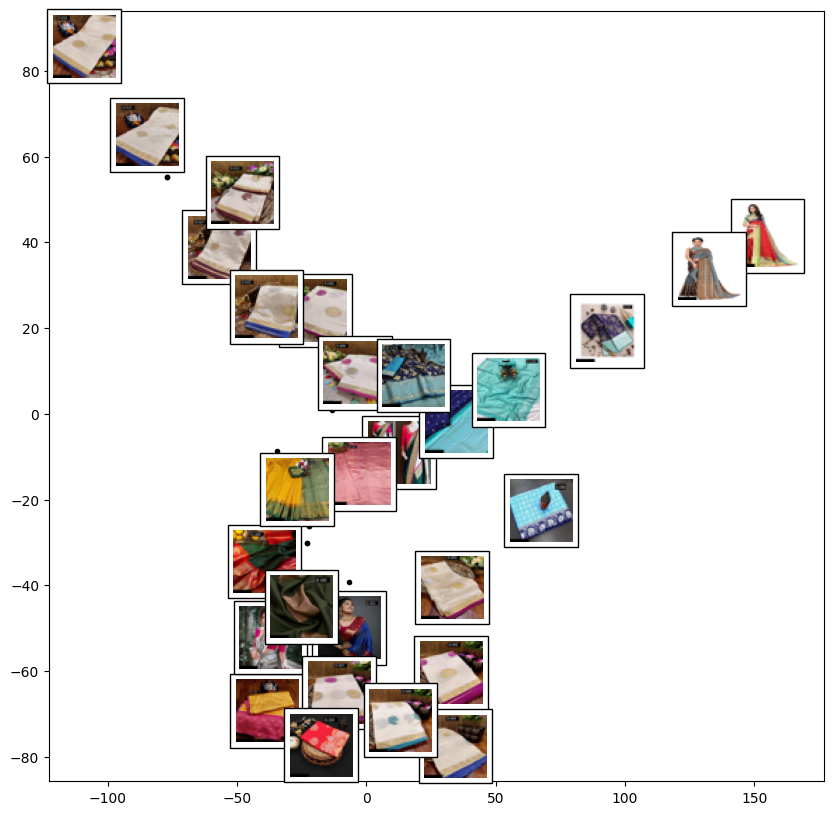

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(image_data, Isomap(n_components=2), images=image_resized, ax=ax,thumb_frac=0.05, cmap='gray')

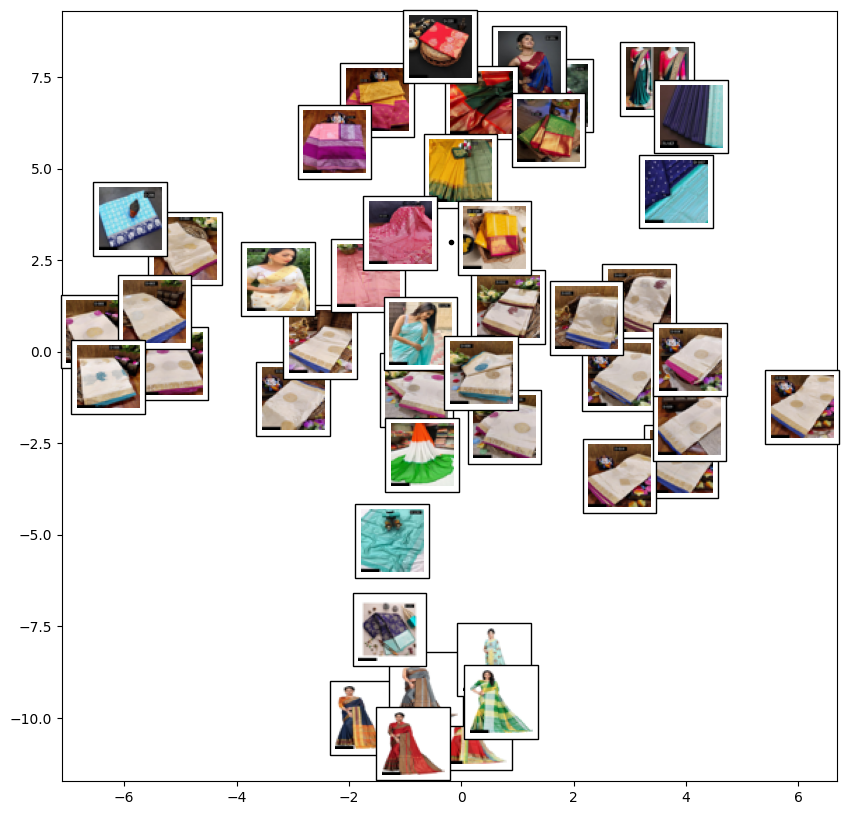

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(image_data, TSNE(n_components=2), images=image_resized, ax=ax,thumb_frac=0.05, cmap='gray')

<p style='text-align: justify;'> 
    Plot for Saree Category - attribute 2 
</p>

In [32]:
image_data = []
for image_id in Sarees_sample2['id']:
  img = load_and_flatten_image(image_id)
  if img is not None:
    image_data.append(img)
image_data = np.array(image_data)

image_resized=[]
for image_id in Sarees_sample2['id']:
  img = load_and_resize_image(image_id)
  if img is not None:
    image_resized.append(img)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


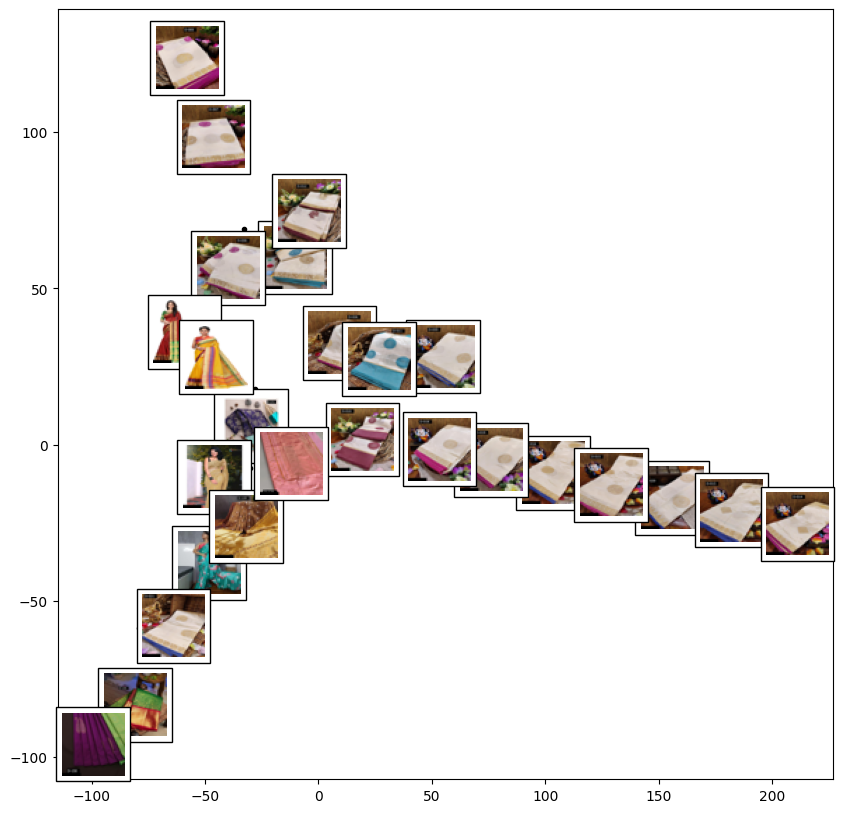

In [33]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(image_data, Isomap(n_components=2), images=image_resized, ax=ax,thumb_frac=0.05, cmap='gray')

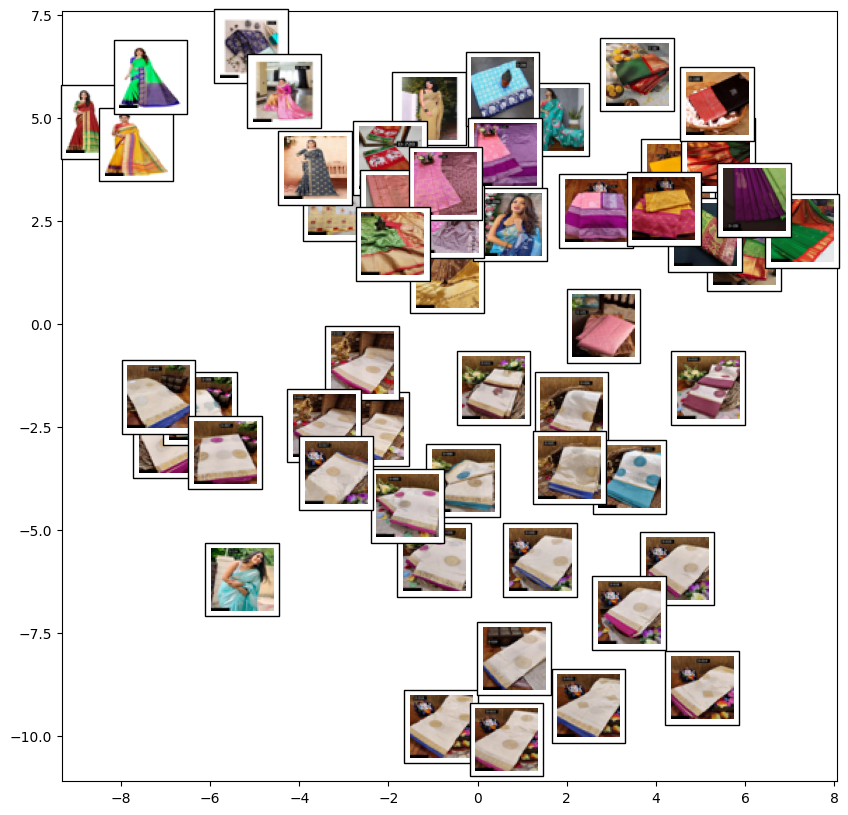

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(image_data, TSNE(n_components=2), images=image_resized, ax=ax,thumb_frac=0.05, cmap='gray')

The first plot has seggregated the images with repect to the color of tha main cloth (not the border and patterns), whereas t SNE has learnt the arranged the images based on the pattern printted in the cloth and also the color!

<p style='text-align: justify;'> 
    Plot for Kurthis Category with attribute 1
</p>

In [35]:
image_data = []
for image_id in Kurtis_sample1['id']:
  img = load_and_flatten_image(image_id)
  if img is not None:
    image_data.append(img)
image_data = np.array(image_data)

image_resized=[]
for image_id in Kurtis_sample1['id']:
  img = load_and_resize_image(image_id)
  if img is not None:
    image_resized.append(img)

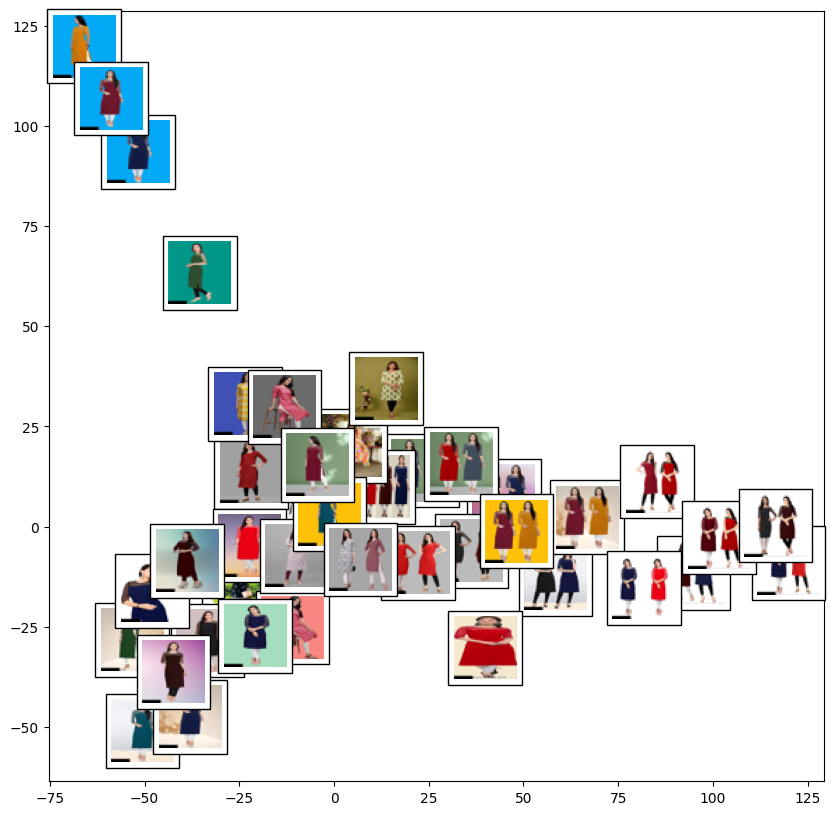

In [36]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(image_data, Isomap(n_components=2), images=image_resized, ax=ax,thumb_frac=0.05, cmap='gray')

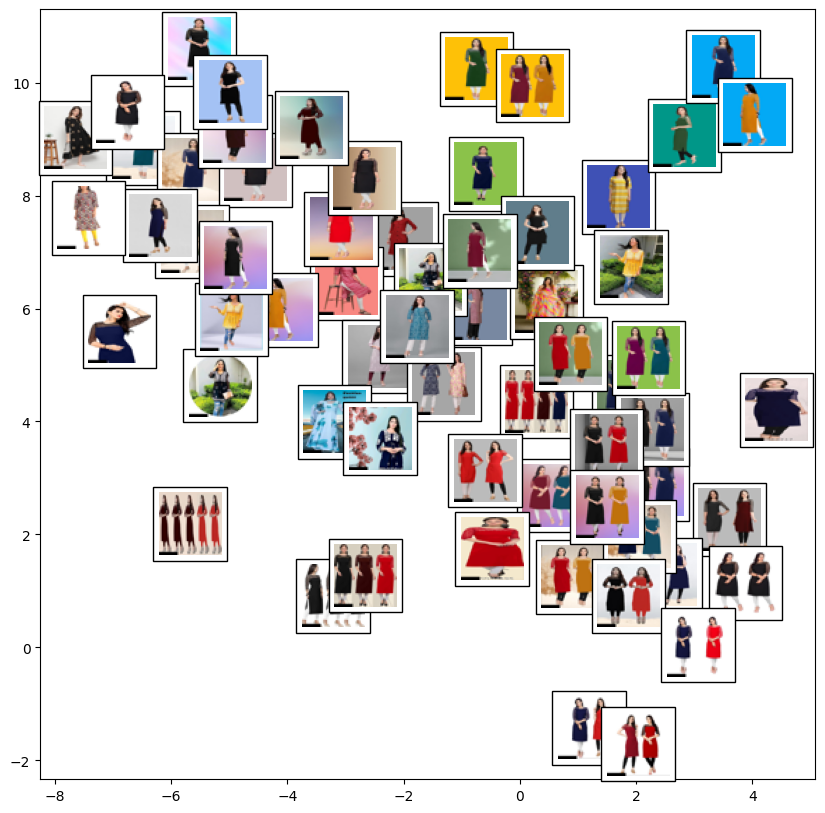

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(image_data, TSNE(n_components=2), images=image_resized, ax=ax,thumb_frac=0.05, cmap='gray')

<p style='text-align: justify;'> 
    Plot for Kurthis Category with attribute 2
</p>

In [38]:
image_data = []
for image_id in Kurtis_sample2['id']:
  img = load_and_flatten_image(image_id)
  if img is not None:
    image_data.append(img)
image_data = np.array(image_data)

image_resized=[]
for image_id in Kurtis_sample2['id']:
  img = load_and_resize_image(image_id)
  if img is not None:
    image_resized.append(img)

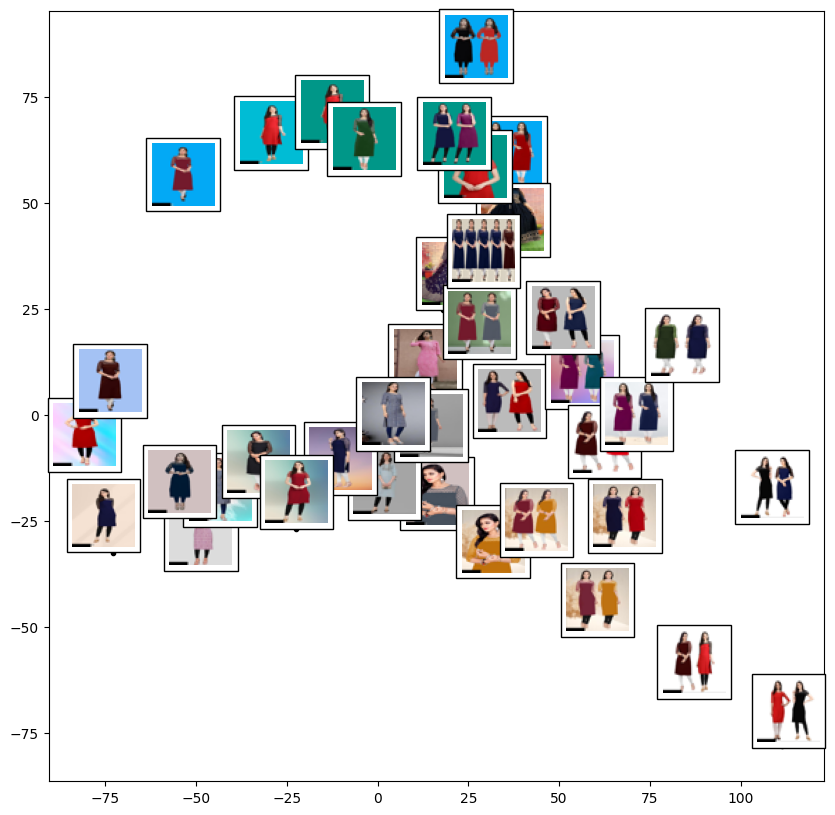

In [39]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(image_data, Isomap(n_components=2), images=image_resized, ax=ax,thumb_frac=0.05, cmap='gray')

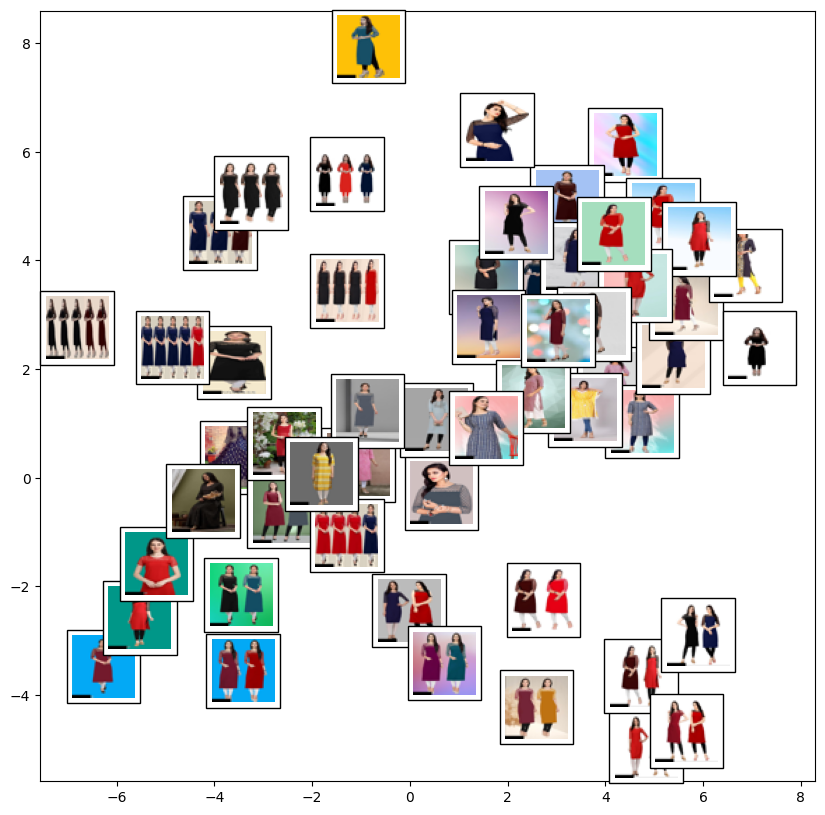

In [40]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(image_data, TSNE(n_components=2), images=image_resized, ax=ax,thumb_frac=0.05, cmap='gray')

For attribute 1, The Isomap and tSNE have arranged the pictures based on the person showcasing the material. If they are facing the camera, the pictures are grouped at the bottom and when they're looking afar, the images are at the corners

For attribute 2, the images are grouped based on the dress color and the person's picture. 

<p style='text-align: justify;'> 
    Plot for Women's TShirt Category with attribute 1
</p>

In [41]:
image_data = []
for image_id in Women_Tshirts_sample1['id']:
  img = load_and_flatten_image(image_id)
  if img is not None:
    image_data.append(img)
image_data = np.array(image_data)

image_resized=[]
for image_id in Women_Tshirts_sample1['id']:
  img = load_and_resize_image(image_id)
  if img is not None:
    image_resized.append(img)

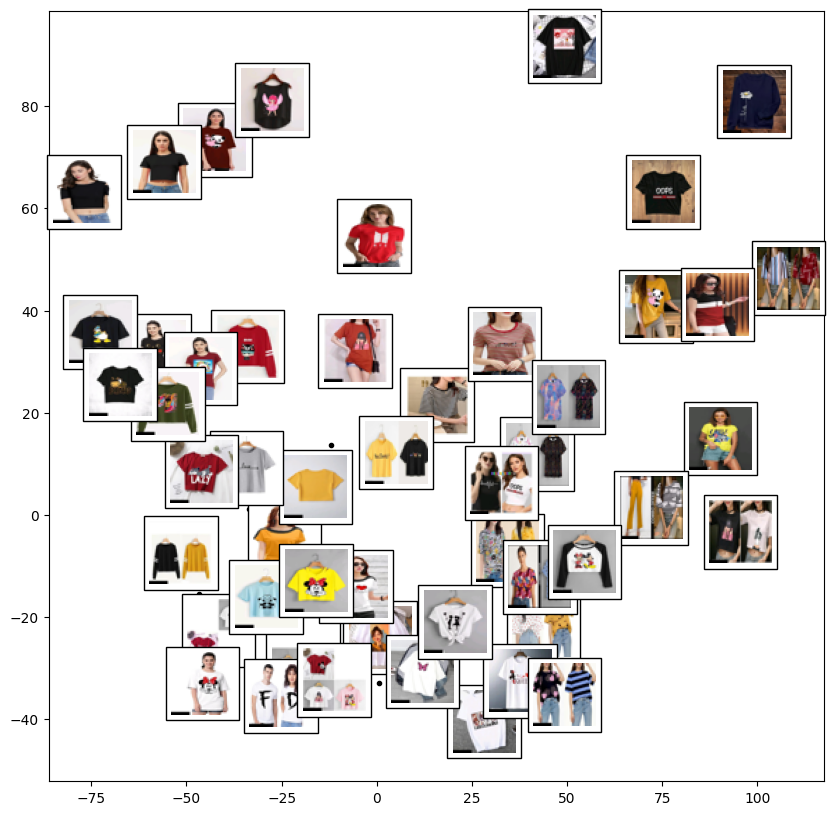

In [42]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(image_data, Isomap(n_components=2), images=image_resized, ax=ax,thumb_frac=0.05, cmap='gray')

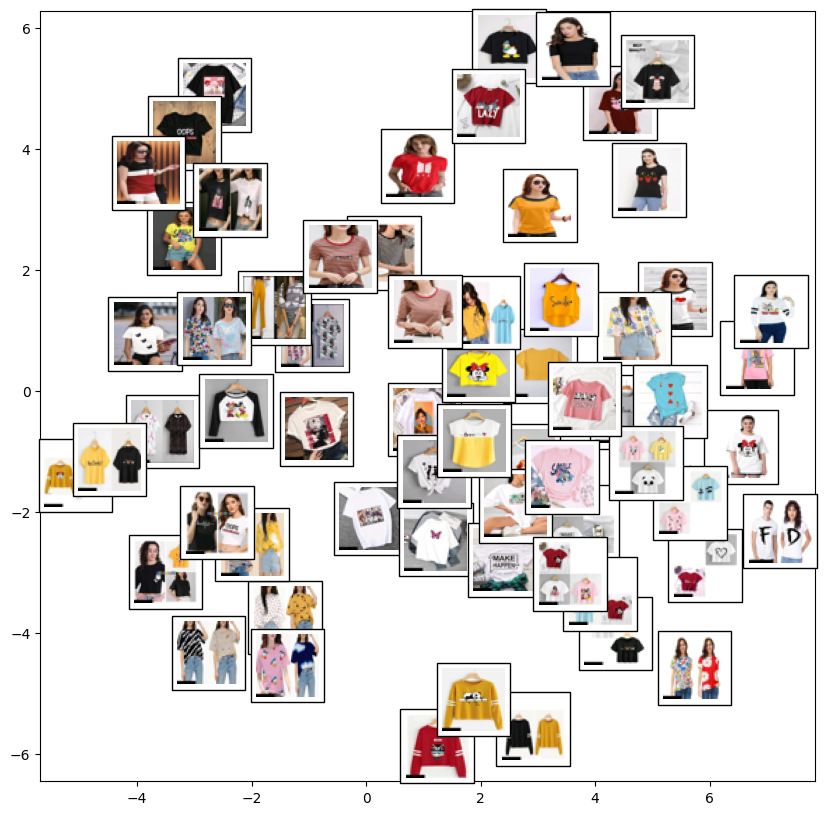

In [43]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(image_data, TSNE(n_components=2), images=image_resized, ax=ax,thumb_frac=0.05, cmap='gray')

<p style='text-align: justify;'> 
    Plot for Women's TShirt Category with attribute 2
</p>

In [44]:
image_data = []
for image_id in Women_Tshirts_sample2['id']:
  img = load_and_flatten_image(image_id)
  if img is not None:
    image_data.append(img)
image_data = np.array(image_data)

image_resized=[]
for image_id in Women_Tshirts_sample2['id']:
  img = load_and_resize_image(image_id)
  if img is not None:
    image_resized.append(img)

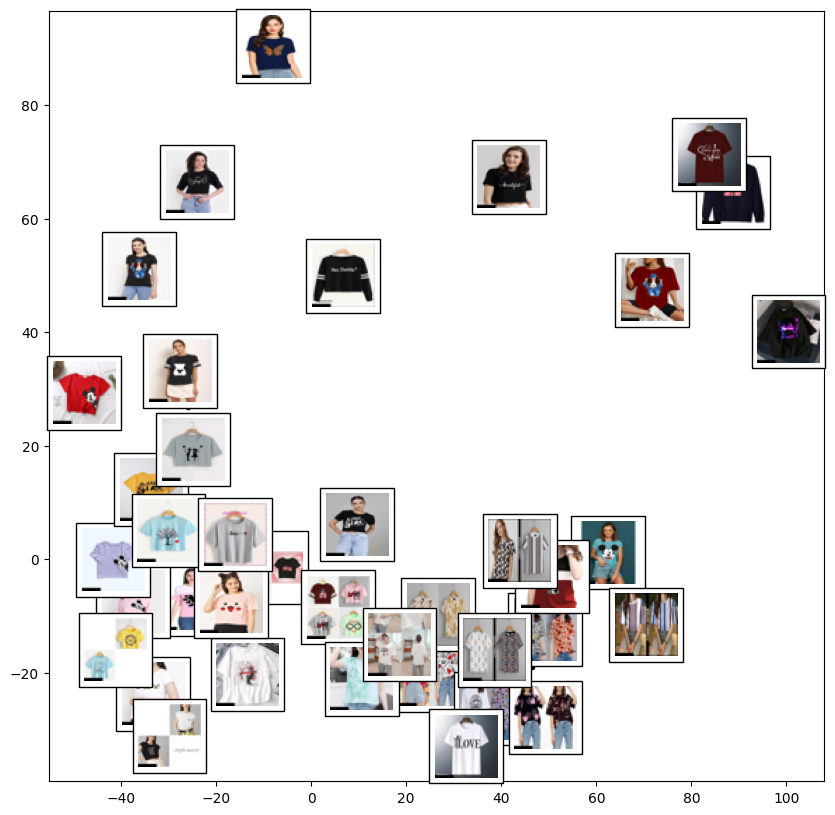

In [45]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(image_data, Isomap(n_components=2), images=image_resized, ax=ax,thumb_frac=0.05, cmap='gray')

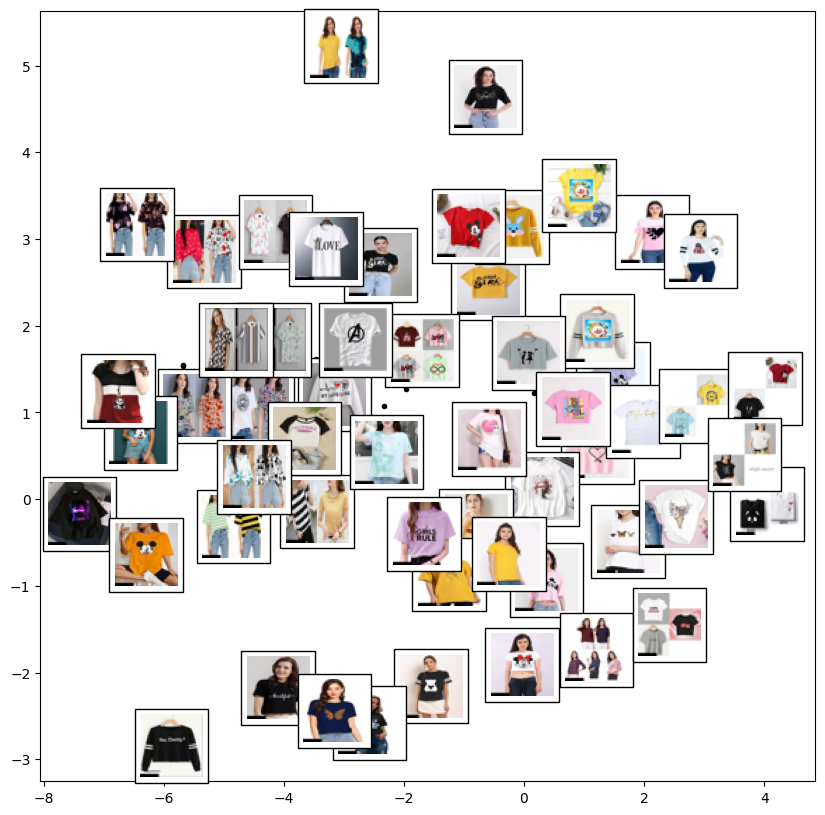

In [46]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(image_data, TSNE(n_components=2), images=image_resized, ax=ax,thumb_frac=0.05, cmap='gray')

<p style='text-align: justify;'> 
    Plot for Women's Tshirts Category with attribute 2
</p>

In [47]:
image_data = []
for image_id in Women_Tshirts_sample2['id']:
  img = load_and_flatten_image(image_id)
  if img is not None:
    image_data.append(img)
image_data = np.array(image_data)

image_resized=[]
for image_id in Women_Tshirts_sample2['id']:
  img = load_and_resize_image(image_id)
  if img is not None:
    image_resized.append(img)

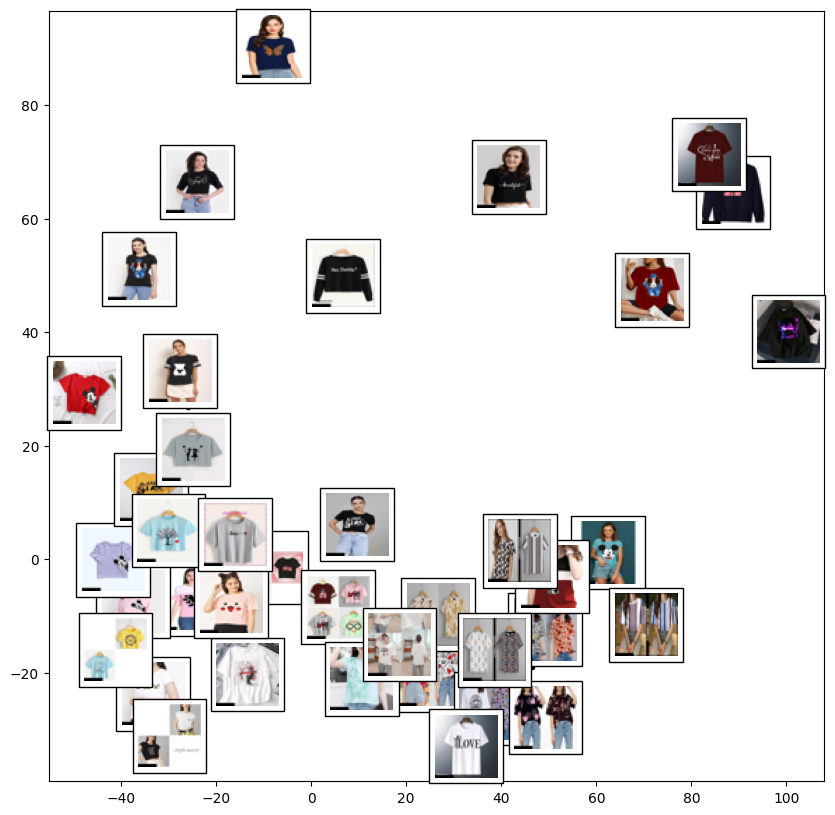

In [48]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(image_data, Isomap(n_components=2), images=image_resized, ax=ax,thumb_frac=0.05, cmap='gray')

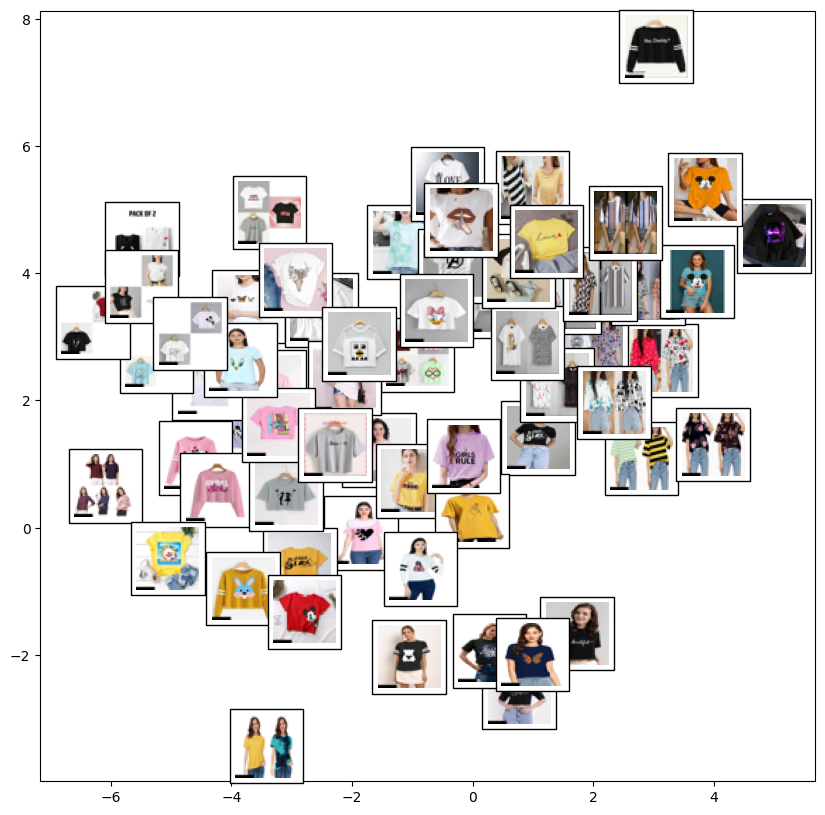

In [49]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(image_data, TSNE(n_components=2), images=image_resized, ax=ax,thumb_frac=0.05, cmap='gray')

The above visualisations for attribute 1 is clustered based on the dress length, the longer the shirt, the farther apart the images are placed. When done for attribute 2, the image clusters are based on the dress color. 

<p style='text-align: justify;'> 
    Plot for Women's Tops and Tunics Category with attribute 1
</p>

In [50]:
image_data = []
for image_id in Women_Tops_Tunics_sample1['id']:
  img = load_and_flatten_image(image_id)
  if img is not None:
    image_data.append(img)
image_data = np.array(image_data)

image_resized=[]
for image_id in Women_Tops_Tunics_sample1['id']:
  img = load_and_resize_image(image_id)
  if img is not None:
    image_resized.append(img)

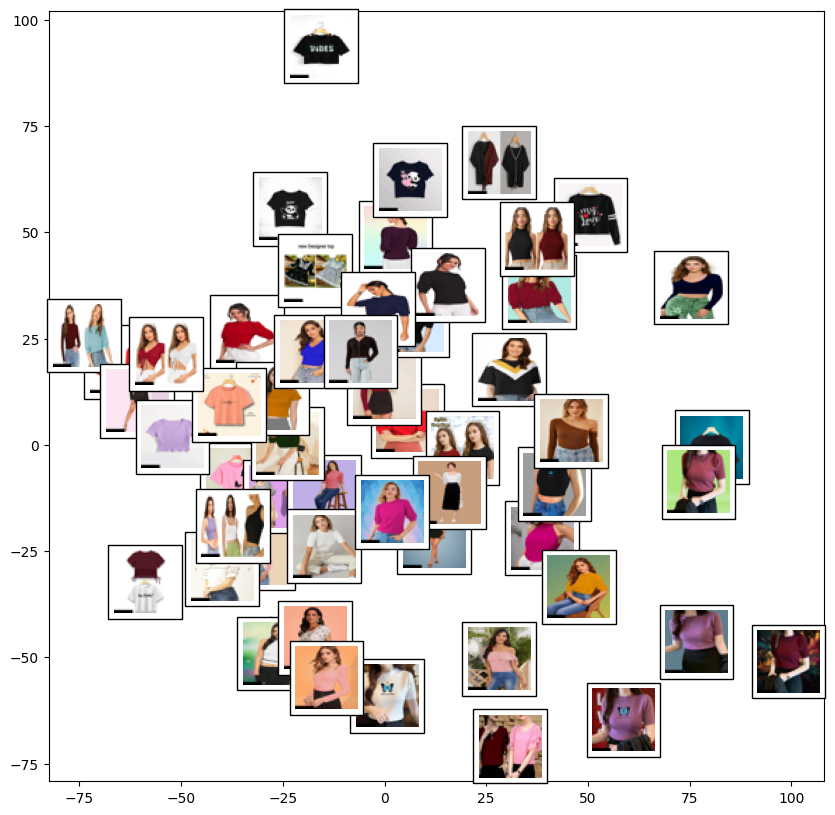

In [51]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(image_data, Isomap(n_components=2), images=image_resized, ax=ax,thumb_frac=0.05, cmap='gray')

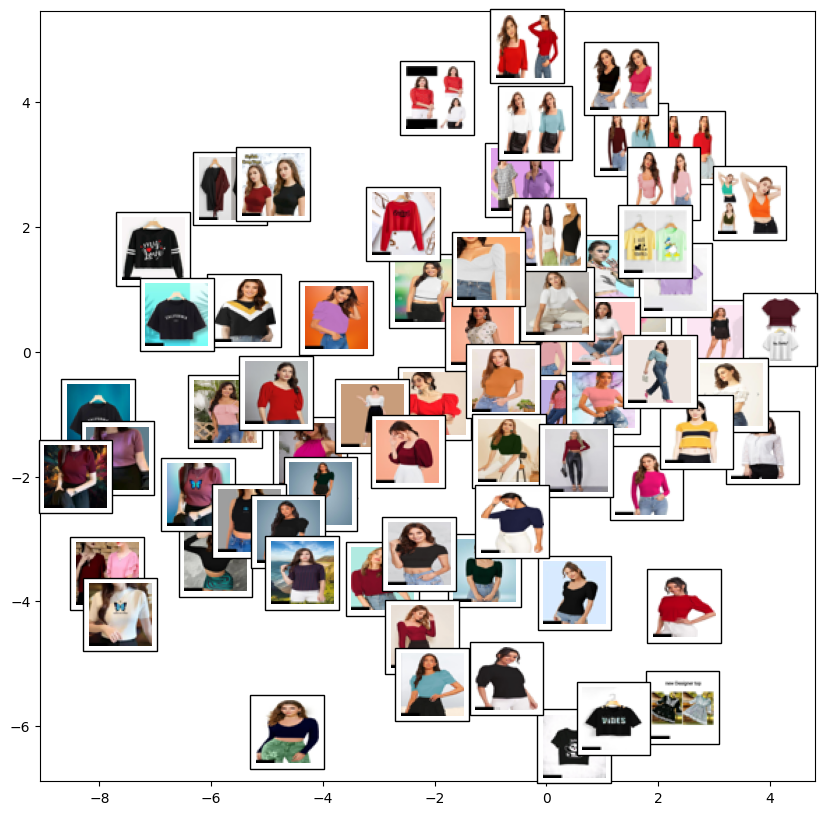

In [52]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(image_data, TSNE(n_components=2), images=image_resized, ax=ax,thumb_frac=0.05, cmap='gray')

<p style='text-align: justify;'> 
    Plot for Women's Tops and Tunics Category with attribute 2
</p>

In [53]:
image_data = []
for image_id in Women_Tops_Tunics_sample2['id']:
  img = load_and_flatten_image(image_id)
  if img is not None:
    image_data.append(img)
image_data = np.array(image_data)

image_resized=[]
for image_id in Women_Tops_Tunics_sample2['id']:
  img = load_and_resize_image(image_id)
  if img is not None:
    image_resized.append(img)

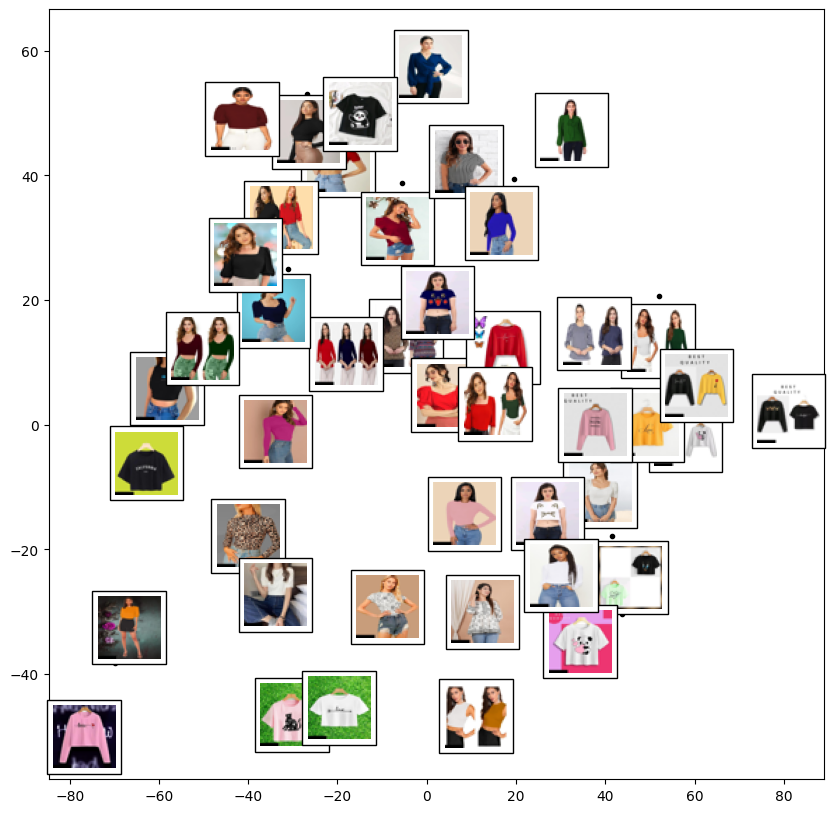

In [54]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(image_data, Isomap(n_components=2), images=image_resized, ax=ax,thumb_frac=0.05, cmap='gray')

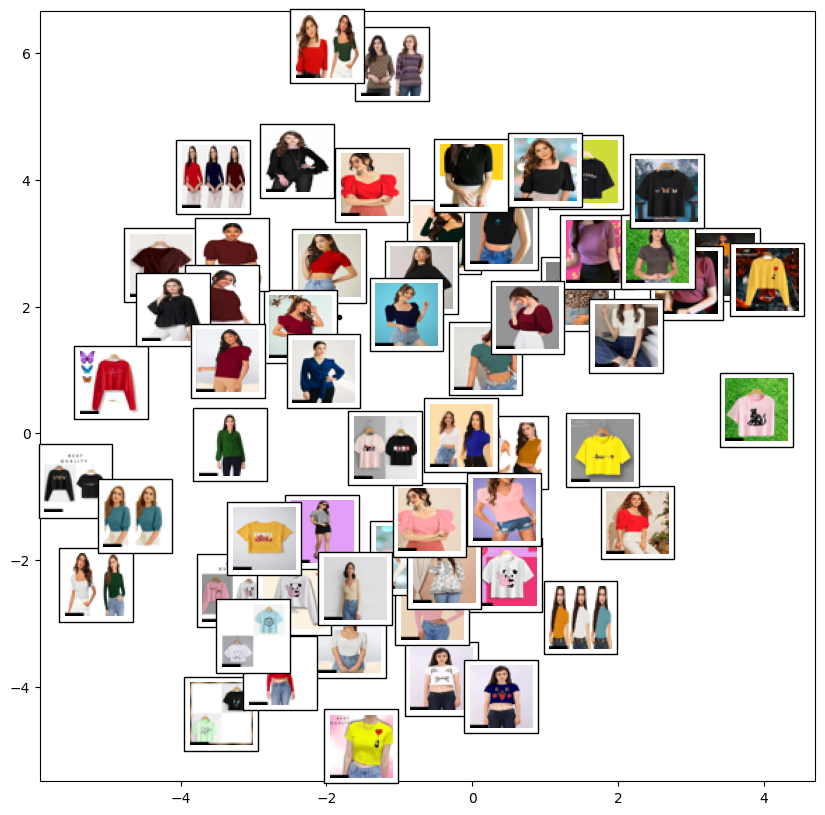

In [55]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(image_data, TSNE(n_components=2), images=image_resized, ax=ax,thumb_frac=0.05, cmap='gray')

For attribute 1, the images are clustered based on the length and color whereas in attribute, the clusters are based on the sleeve length. 